In [3]:
%pylab inline
import Sarba17_SNRLC_oneisentwhite as snrlc
import s17lc

Populating the interactive namespace from numpy and matplotlib


In [15]:
path = '/Users/sumits2k/Desktop/Research/SNResearch2/RadioSNRs/RADSNRS/Inputs/'
table = np.genfromtxt(path+'KnownSNRS_CaseBhat98.dat',skip_header=19,usecols=(2,3,4))  
sb_knownSNRs = table[:,0]
diam_knownSNRs = table[:,2]
print diam_knownSNRs
#Column 2: SB, Col3: Distance, Col4: Diameter
pc = 3.086e16 #m
joule = 1.0e7 #ergs

lum_knownSNRs = sb_knownSNRs*(3.14/4.0)*((diam_knownSNRs*pc)**2.0)*joule
print lum_knownSNRs

[  4.  32.  12.  21.   8.  28.  52.  44.  38.  45.  21.  24.  24.   5.
 101.  31.  37.  11.  51.  96.  83.  57. 104.  20. 102.  35.  36.  18.
  23.  34.  18.  63.  10.  39.  45.   9.  64.]
[3.82764332e+22 2.06692739e+23 1.07652468e+23 1.08796276e+23
 2.29658599e+23 5.56802489e+22 5.45798015e+23 1.88152592e+22
 2.80673908e+22 1.30192204e+22 4.61559958e+22 2.23917134e+22
 1.33489061e+22 2.99034634e+24 2.59288446e+22 8.62116851e+21
 6.85708844e+21 1.17595370e+23 2.13891998e+22 4.27164995e+21
 5.09862275e+22 1.33589985e+22 2.10233309e+22 3.58841561e+22
 3.88894542e+22 5.95265819e+22 1.16264666e+22 7.99319578e+22
 2.13555584e+22 3.62968239e+22 7.75097772e+21 4.74747386e+22
 3.13986366e+22 5.45798015e+23 2.11940797e+23 3.63327081e+23
 1.13298242e+23]


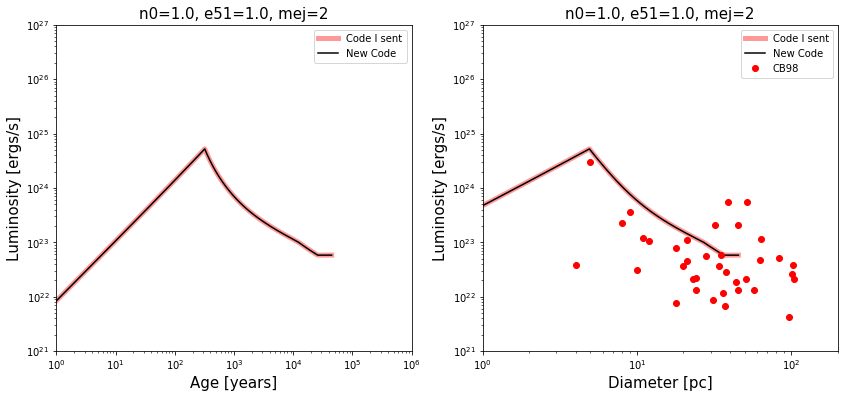

In [20]:
n0 = 1.
e51 = 1.
mej = 2
p = 2.5
nu = 1.4e9
epse = 0.0042
#From my original code
tim, rad, lum, vel = snrlc.lightcurve_Full(n0=n0, mej=mej, e51=e51, epse=epse, pp=p, sntype='cc', nu=nu)

#From the code that I sent you
rs = np.zeros(tim.size)
vs = np.zeros(tim.size)
for i in range(tim.size):
    rs[i], vs[i] = s17lc.radius_velocity(tim[i], n0, mej, e51, sntype='cc')
ls = s17lc.luminosity(rs, vs, n0, epse, p, nu)

ls[vs<200.]=0 #this is from the assumption in the paper that after shock decelerates to 200 km/s, 
              #electrons aren't accelerated efficiently, so no radio emission. 

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title(r'n0={0}, e51={1}, mej={2}'.format(n0, e51, mej), fontsize=15)
plt.plot(tim[lum>0], lum[lum>0], 'r-', lw=5., alpha=0.4, label='Code I sent')
plt.plot(tim[ls>0], ls[ls>0], 'k-', label='New Code')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Age [years]', fontsize=15)
plt.ylabel('Luminosity [ergs/s]', fontsize=15)
plt.xlim(1., 1.0e6)
plt.ylim(1.0e21, 1.0e27)
plt.legend()

plt.subplot(1,2,2)
plt.title(r'n0={0}, e51={1}, mej={2}'.format(n0, e51, mej), fontsize=15)
plt.plot(2.*rad[lum>0], lum[lum>0], 'r-', lw=5., alpha=0.4, label='Code I sent')
plt.plot(2.*rs[ls>0], ls[ls>0], 'k-', label='New Code')
plt.plot(diam_knownSNRs, lum_knownSNRs, 'ro', label='CB98')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Diameter [pc]', fontsize=15)
plt.ylabel('Luminosity [ergs/s]', fontsize=15)
plt.xlim(1., 200.)
plt.ylim(1.0e21, 1.0e27)
plt.legend()

plt.show()